# CS 773 Data Mining and Security

## Course Project - Analyzing Open University Learning Analytics Dataset 

### Problem Statement 

Based on the given data of students enrolled in various courses identify the student who is at-risk so that suitable interventions can be taken to help students succeed. 

***Part-2 : Exploratory Data Analysis (EDA)***

In this part we visualize the data to gain insights and find patterns in the data.

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#bokeh
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure, output_file, show, ColumnDataSource

Loading BokehJS ...

In [3]:
# Reading Data
student_info = pd.read_csv('../data/studentInfo.csv')
student_assessment = pd.read_csv('../data/studentAssessment.csv')
student_registration = pd.read_csv('../data/studentRegistration.csv')
student_vle = pd.read_csv('../data/studentVle.csv')
assessments = pd.read_csv('../data/assessments.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')

#check for the data
print('----- Rows -----')
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

----- Rows -----
Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


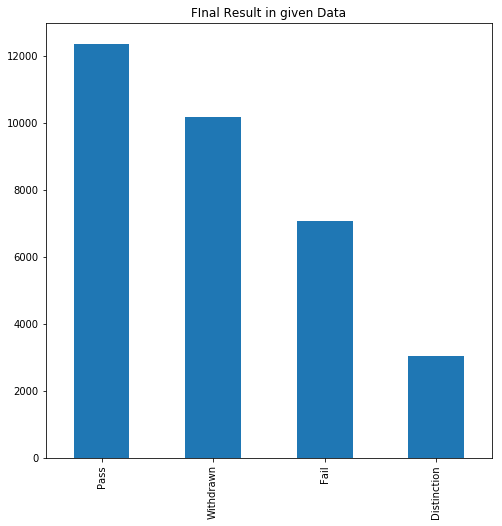

In [100]:
# we want to see how many students pass or fail in the previous data
print(student_info['final_result'].value_counts())
student_info['final_result'].value_counts().plot(kind='bar', title='FInal Result in given Data', figsize=(8,8))
plt.show()

***We can see that out of 32593, 10156 students have withdrawn from the courses. from this we could draw an inference for withdrawn students i.e. need to check if withdrawn students have taken any other courses in that semester or not.***

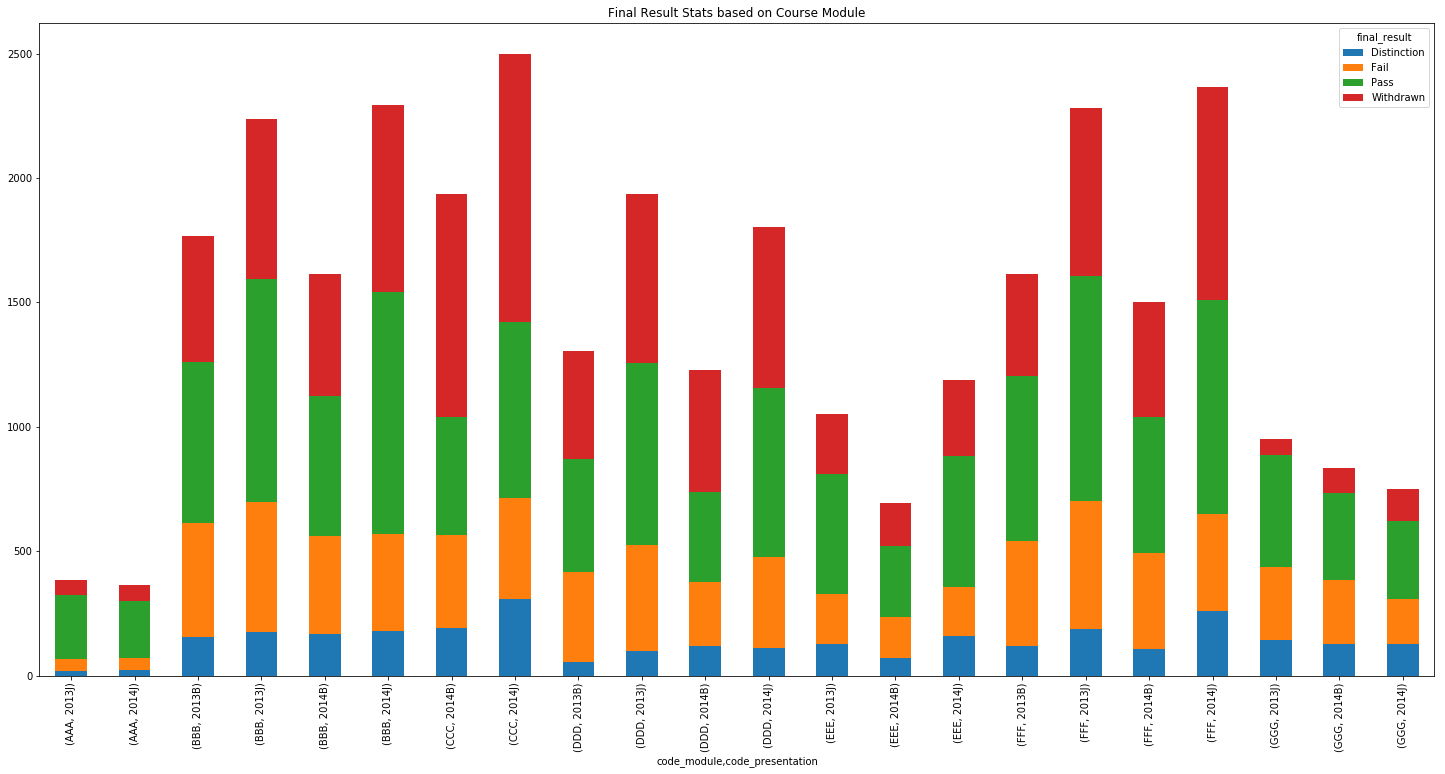

In [64]:
# get the students final result as per the course
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', stacked=True, title='Final Result Stats based on Course Module',figsize=(25,12))
#student_info.groupby(['code_module','code_presentation','final_result']).size()
#final_result_stats.plot(kind='bar', x = 'code_module')
plt.show()

***As stacked bar graphs are confusing to infer i have used unstacked bar graph to show the stats***

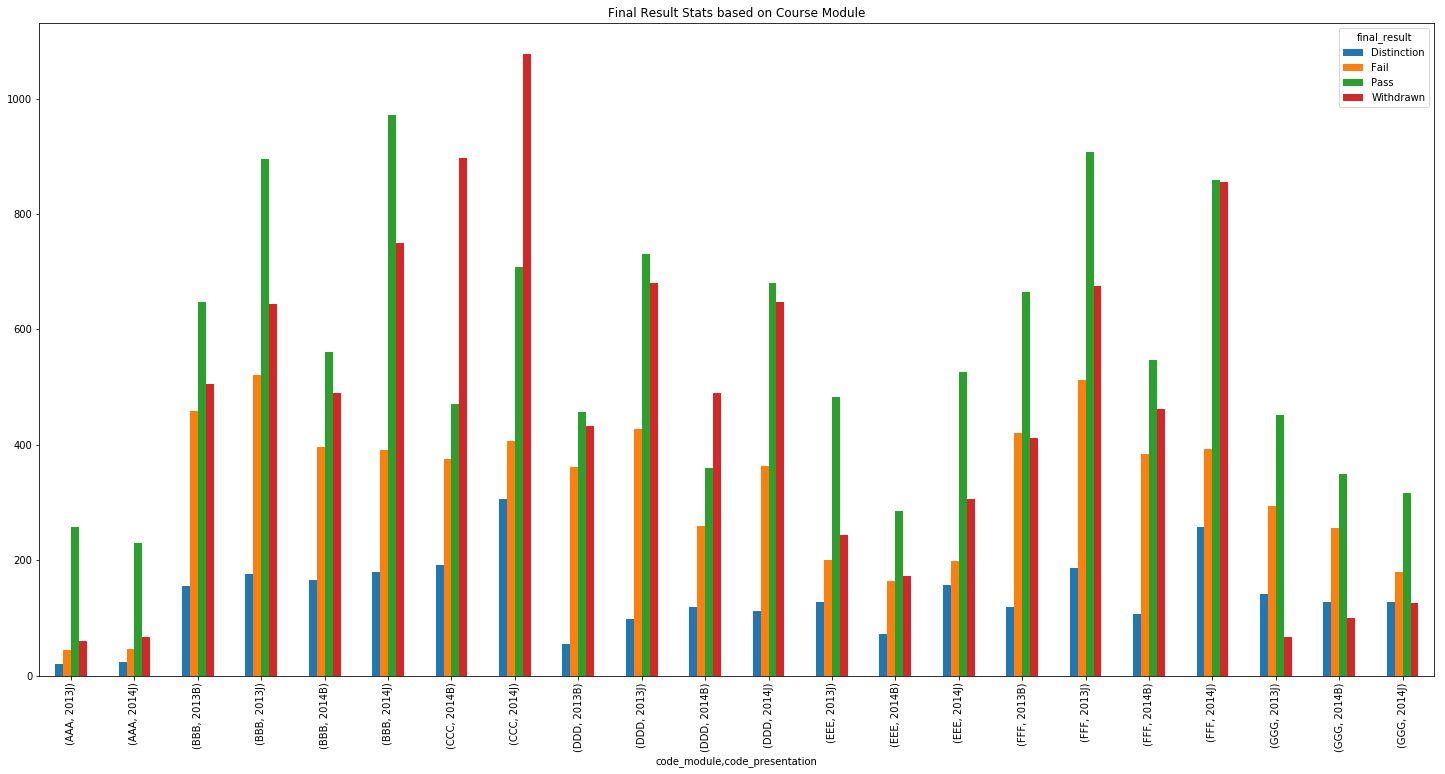

In [68]:
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
plt.show()

##### Insights from above Graph (Final Results Based on Course Module, Course_presentation) #####
- all courses have good pass percentage when compared to their registration rate
- courses AAA have less withdrawl rate
- For Course BBB the rate looks uniform for both years
- Withdrawl rate is high for CCC in both the offerings 2014B, 2014J, infact it increased in the later year along with students registered, i.e. more students got registered in course and nearly 40% of them withdrew from the course.
- For course DDD the rate of change is uniform in all offerings
- Course EEE has third less withdrawl rate compared to all others, Failure rate is also less
- Course FFF withdrawl rate can be seen increasing based on past 2 years data, whereas other rates(Pass, Fail) remains uniform. 
- we can see that for Course GGG in 2013J withdrawl rate was less which has been increased in 2014B and 2014J, also number of students registering for the course are also decreasing
- From the above we can see that all the courses we have a good amount of students being withdrawn from the subjects reason unknown

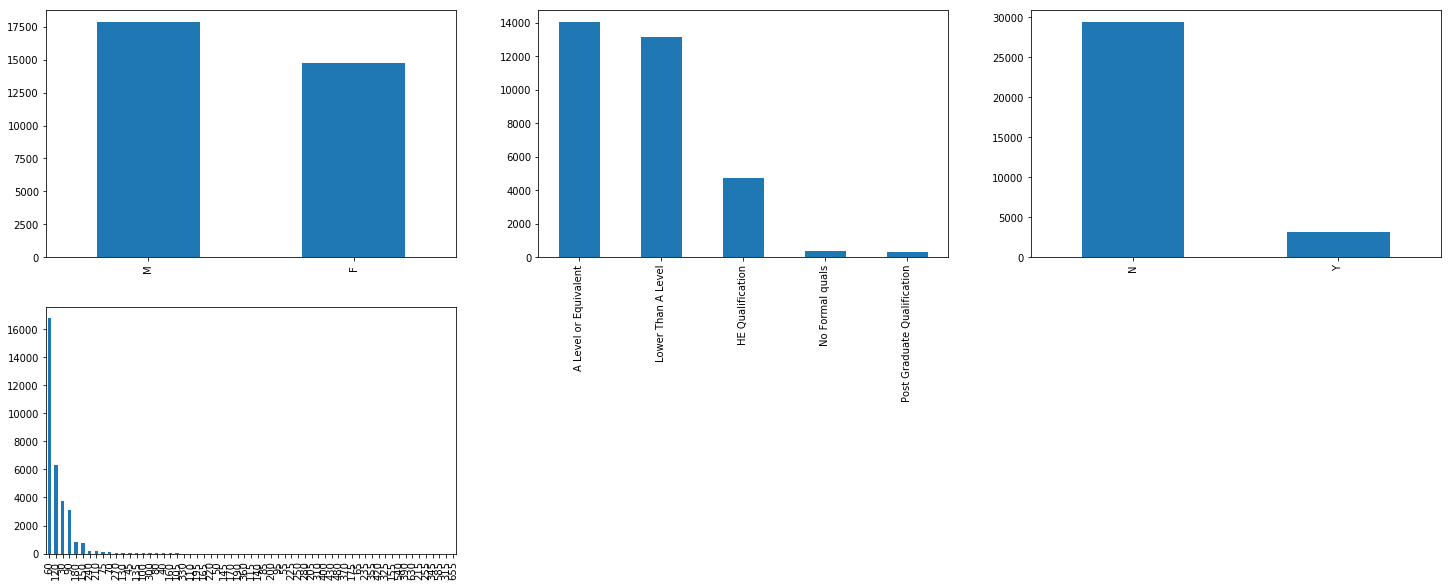

In [5]:
# Visualizing all the data
#-- gender
plt.figure(figsize=(25,10))
plt.subplot(231)
student_info['gender'].value_counts().plot.bar()
#-- higher Education
plt.subplot(232)
student_info['highest_education'].value_counts().plot.bar()
#--disability
plt.subplot(233)
student_info['disability'].value_counts().plot.bar()
#--Student credits
plt.subplot(234)
student_info['studied_credits'].value_counts().plot.bar()


***lets dive more deep into the data and get student results based on the following.***
- gender : flter the final results based on gender
- age_band : lets see what are the stats when we segregate them by age_band
- Education : lets see the stats when filtered by their past education
- Studied credits : filter the data based on past_credits

***Using gender*** 
- lets get some insights about the gender

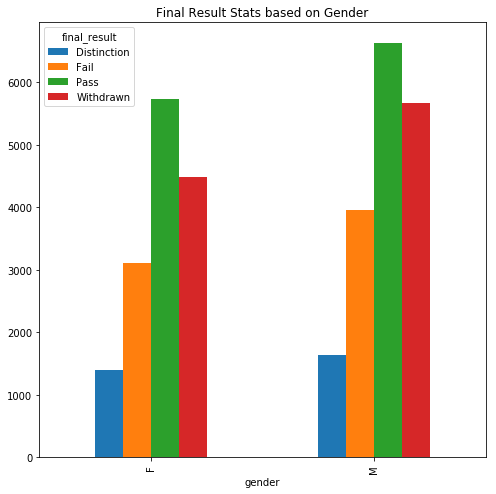

In [82]:
student_info.groupby(['gender','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Gender',figsize=(8,8))
plt.show()

In [84]:
student_info.groupby(['code_module','code_presentation','gender','final_result']).size().unstack()

final_result                          Distinction  Fail  Pass  Withdrawn
code_module code_presentation gender                                    
AAA         2013J             F                 5    17    98         29
                              M                15    28   160         31
            2014J             F                 8    22    97         38
                              M                16    24   132         28
BBB         2013B             F               135   396   580        448
                              M                20    63    68         57
            2013J             F               160   446   798        576
                              M                16    75    98         68
            2014B             F               147   347   496        444
                              M                19    49    65         46
            2014J             F               168   341   854        655
                              M                12    50   118         94
CCC         2014B             F                52    66   121        217
                              M               140   309   350        681
            2014J             F                91    79   190        285
                              M               215   327   519        792
DDD         2013B             F                15   128   188        187
                              M                39   233   268        245
            2013J             F                44   158   286        312
                              M                54   270   445        369
            2014B             F                36    84   145        209
                              M                83   175   215        281
            2014J             F                27   138   274        287
                              M                85   226   406        360
EEE         2013J             F                12    16    52         23
                              M               115   184   430        220
            2014B             F                 7    13    33         23
                              M                65   151   252        150
            2014J             F                19    19    67         53
                              M               138   179   460        253
FFF         2013B             F                28    63   131         90
                              M                90   358   533        321
            2013J             F                45    73   148        128
                              M               142   440   760        547
            2014B             F                16    65    96         85
                              M                91   319   451        377
            2014J             F                59    51   165        171
                              M               199   342   694        684
GGG         2013J             F               116   235   371         52
                              M                25    59    80         14
            2014B             F               102   205   282         77
                              M                26    50    68         23
            2014J             F               102   141   263         97
                              M                25    38    54         29

***Using age_band*** 
- lets get some insights about the age group

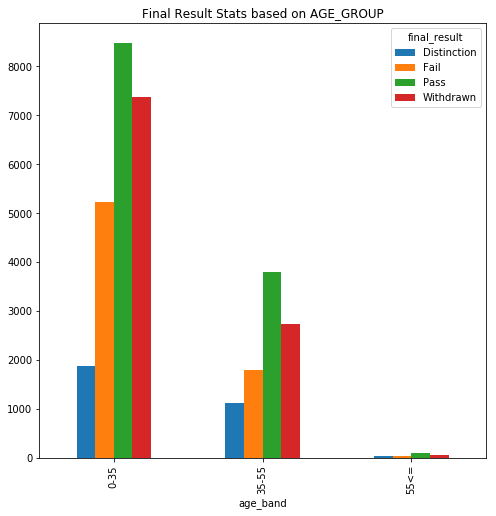

In [81]:
student_info.groupby(['age_band','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on AGE_GROUP',figsize=(8,8))
plt.show()

***plotting the data for the age_band based on code_module and code_presentation***

In [101]:
# create subplots for all the data based on course
#---plot
#student_info.groupby(['age_band','code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
#plt.show()
#--- data
student_info.groupby(['code_module','code_presentation','age_band','final_result']).size().unstack()

final_result                            Distinction   Fail   Pass  Withdrawn
code_module code_presentation age_band                                      
AAA         2013J             0-35              6.0   27.0  120.0       26.0
                              35-55             9.0   17.0  121.0       31.0
                              55<=              5.0    1.0   17.0        3.0
            2014J             0-35              8.0   23.0  107.0       35.0
                              35-55            15.0   21.0  112.0       25.0
                              55<=              1.0    2.0   10.0        6.0
BBB         2013B             0-35             86.0  338.0  426.0      344.0
                              35-55            69.0  121.0  222.0      161.0
            2013J             0-35             89.0  369.0  567.0      449.0
                              35-55            87.0  152.0  328.0      194.0
                              55<=              NaN    NaN    1.0        1.0
            2014B             0-35             98.0  280.0  366.0      356.0
                              35-55            68.0  115.0  195.0      134.0
                              55<=              NaN    1.0    NaN        NaN
            2014J             0-35             99.0  273.0  608.0      533.0
                              35-55            81.0  117.0  362.0      214.0
                              55<=              NaN    1.0    2.0        2.0
CCC         2014B             0-35            121.0  294.0  323.0      658.0
                              35-55            67.0   78.0  145.0      236.0
                              55<=              4.0    3.0    3.0        4.0
            2014J             0-35            177.0  288.0  510.0      766.0
                              35-55           117.0  113.0  190.0      302.0
                              55<=             12.0    5.0    9.0        9.0
DDD         2013B             0-35             38.0  271.0  312.0      303.0
                              35-55            15.0   89.0  137.0      122.0
                              55<=              1.0    1.0    7.0        7.0
            2013J             0-35             65.0  328.0  549.0      524.0
                              35-55            29.0   98.0  172.0      150.0
                              55<=              4.0    2.0   10.0        7.0
            2014B             0-35             83.0  208.0  273.0      356.0
...                                             ...    ...    ...        ...
EEE         2013J             0-35             88.0  158.0  356.0      185.0
                              35-55            38.0   42.0  125.0       58.0
                              55<=              1.0    NaN    1.0        NaN
            2014B             0-35             50.0  126.0  212.0      131.0
                              35-55            22.0   38.0   70.0       42.0
                              55<=              NaN    NaN    3.0        NaN
            2014J             0-35            117.0  147.0  410.0      245.0
                              35-55            38.0   50.0  114.0       59.0
                              55<=              2.0    1.0    3.0        2.0
FFF         2013B             0-35             75.0  319.0  459.0      291.0
                              35-55            43.0  102.0  201.0      120.0
                              55<=              NaN    NaN    4.0        NaN
            2013J             0-35            121.0  408.0  689.0      504.0
                              35-55            64.0  102.0  215.0      171.0
                              55<=              2.0    3.0    4.0        NaN
            2014B             0-35             81.0  299.0  404.0      346.0
                              35-55            26.0   83.0  141.0      116.0
                              55<=              NaN    2.0    2.0        NaN
            2014J             0-35            163.0  305.0  632.0      64

2) Using highest_education
- lets get some insights about the highest_education

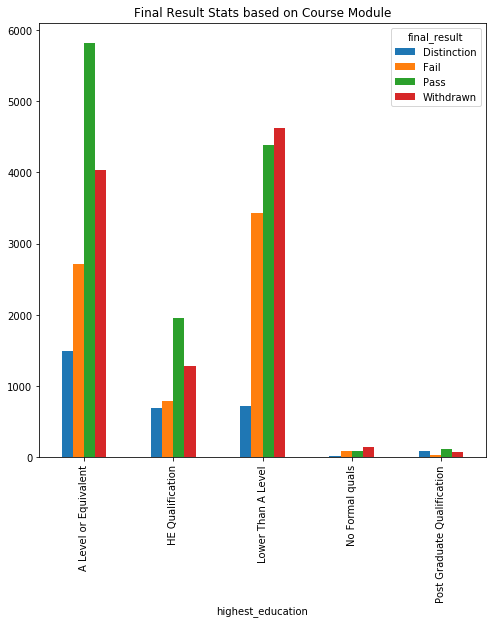

In [83]:
student_info.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(8,8))
plt.show()

In [91]:
# data of students for courses
student_info.groupby(['code_module','code_presentation','highest_education','final_result']).size().unstack()

final_result                                               Distinction   Fail  \
code_module code_presentation highest_education                                 
AAA         2013J             A Level or Equivalent               10.0   23.0   
                              HE Qualification                     3.0   11.0   
                              Lower Than A Level                   5.0   10.0   
                              Post Graduate Qualification          2.0    1.0   
            2014J             A Level or Equivalent               15.0   26.0   
                              HE Qualification                     5.0    9.0   
                              Lower Than A Level                   4.0   11.0   
BBB         2013B             A Level or Equivalent               84.0  167.0   
                              HE Qualification                    36.0   35.0   
                              Lower Than A Level                  34.0  253.0   
                              No Formal quals                      NaN    4.0   
                              Post Graduate Qualification          1.0    NaN   
            2013J             A Level or Equivalent              107.0  175.0   
                              HE Qualification                    30.0   49.0   
                              Lower Than A Level                  34.0  285.0   
                              No Formal quals                      2.0   12.0   
                              Post Graduate Qualification          3.0    NaN   
            2014B             A Level or Equivalent               96.0  144.0   
                              HE Qualification                    33.0   36.0   
                              Lower Than A Level                  34.0  208.0   
                              No Formal quals                      1.0    8.0   
                              Post Graduate Qualification          2.0    NaN   
            2014J             A Level or Equivalent               91.0  128.0   
                              HE Qualification                    53.0   39.0   
                              Lower Than A Level                  34.0  218.0   
                              No Formal quals                      1.0    6.0   
                              Post Graduate Qualification          1.0    NaN   
CCC         2014B             A Level or Equivalent               89.0  171.0   
                              HE Qualification                    56.0   70.0   
                              Lower Than A Level                  28.0  129.0   
...                                                                ...    ...   
FFF         2013B             Post Graduate Qualification          2.0    2.0   
            2013J             A Level or Equivalent               96.0  172.0   
                              HE Qualification                    45.0   64.0   
                              Lower Than A Level                  43.0  270.0   
                              No Formal quals                      NaN    3.0   
                              Post Graduate Qualification          3.0    4.0   
            2014B             A Level or Equivalent               60.0  150.0   
                              HE Qualification                    15.0   40.0   
                              Lower Than A Level                  29.0  176.0   
                              No Formal quals                      NaN   13.0   
                              Post Graduate Qualification          3.0    5.0   
            2014J             A Level or Equivalent              135.0  169.0   
                              HE Qualification                    53.0   36.0   
                              Lower Than A Level                  63.0  183.0   
                              No Formal quals                      3.0    4.0   
                              Post Graduate Qualification          4.0    1.0   
GGG         2013J             A

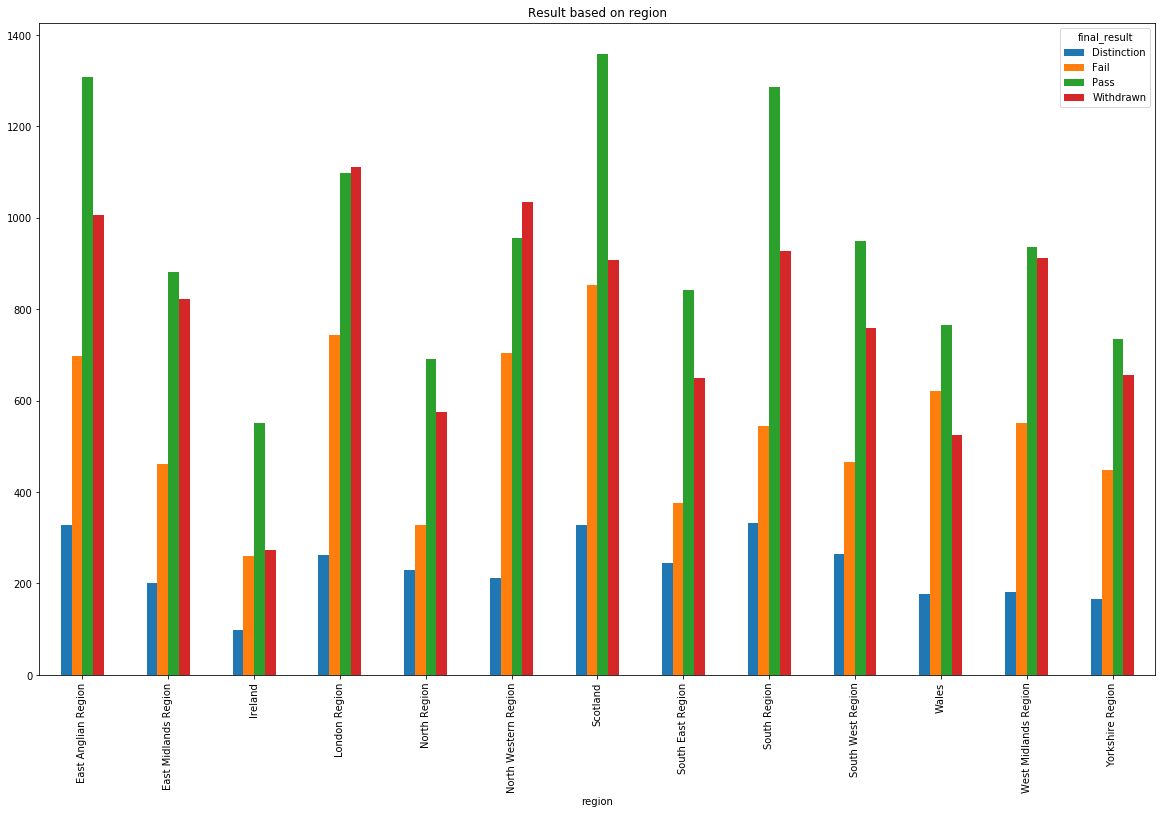

In [6]:
student_info.groupby(['region','final_result']).size().unstack().plot(kind='bar', figsize = (20,12), title='Result based on region')
plt.show()